# Filtrado de Alta Correlación
La alta correlación entre dos variables significa que tienen tendencias similares y es probable que contengan información similar. Esto puede reducir drásticamente el rendimiento de algunos modelos (En regresiones lineal y logística, por ejemplo), adicionalmente puede ocasionar sobre ajuste (Overfitting). 
Podemos calcular la correlación entre variables independientes que son de naturaleza numérica. Si el coeficiente de correlación cruza un cierto valor umbral, podemos descartar una de las variables 
(Importante, no olvide que descartar una variable es altamente subjetivo y siempre debe hacerse teniendo en cuenta el dominio del problema).

#Como pauta general, debemos mantener aquellas variables que muestran una correlación importante o alta con la variable objetivo.

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting libraries
import seaborn as sns

#Importing the data
train=pd.read_csv("Train_data.csv")
# To show rows and columns
train.shape

(8523, 12)

In [4]:
train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Eliminaremos la variable dependiente (Item_Outlet_Sales) y guardaremos las variables restantes en un nuevo marco de datos (df).

Para visualizar la correlación

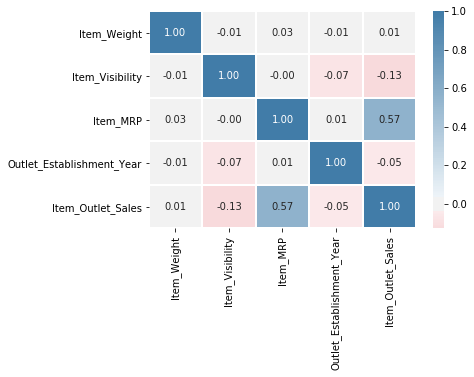

In [8]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
sns.heatmap(train.corr(), center=0,cmap=cmap, linewidths=1,annot=True, fmt=".2f")

In [5]:
df=train.drop('Item_Outlet_Sales', 1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014048,0.027141,-0.011588
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834
Item_MRP,0.027141,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000



Perfecto! 
No tenemos ninguna variable con una alta correlación en nuestro conjunto de datos. Como regla  general, si la correlación entre un par de variables es mayor que 0.5-0.6, deberíamos considerar seriamente descartar una de esas variables. Pero es importante comprender que correlacipon no implica CAUSALIDAD

Para vidualizar la matriz de correlación

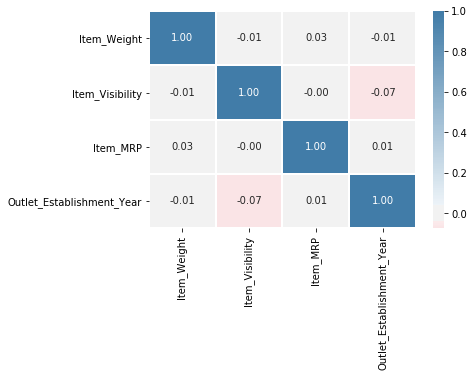

In [7]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
sns.heatmap(df.corr(), center=0,cmap=cmap, linewidths=1,annot=True, fmt=".2f")